<a href="https://colab.research.google.com/github/ssantos89/ApoliceSeguros_RandomForest/blob/main/ApoliceSeguros_RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Biblioteca para modelagem de dados
import pandas as pd

# Biblioteca para recursos matemáticos
import numpy as np

# Bibliotecas de plotagem de dados
import seaborn as sns
import matplotlib.pyplot as plt

# Biblioteca/Função para ignorar avisos
from warnings import filterwarnings

In [2]:
# Plan 1 = Base de Dados
# Plan 2 = Novas Entradas
Base_Dados = pd.read_excel('BaseDados_FlorestaDeDecisão.xlsx', 'Plan1')

In [4]:
# Legenda Serviço:
# 1 = Não Usou
# 2 = Serviço
# 3 = Furto

Base_Dados.head()

,Id Cliente,Idade,Preço Seguro,CEP,Serviço
0,1,69,3930,19005,3
1,2,27,3336,19027,1
2,3,49,3936,19001,3
3,4,60,157,19009,1
4,5,51,3998,19050,2


In [5]:
# Verificando type dos arquivos e estrutura
# da Base de Dados

Base_Dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Id Cliente    500 non-null    int64
 1   Idade         500 non-null    int64
 2   Preço Seguro  500 non-null    int64
 3   CEP           500 non-null    int64
 4   Serviço       500 non-null    int64
dtypes: int64(5)
memory usage: 19.7 KB


In [6]:
# Descrição Estatística para entendimento
# da Base de Dados

Base_Dados.describe()

,Id Cliente,Idade,Preço Seguro,CEP,Serviço
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,49.550000,1939.268000,19024.812000,1.904000
std,144.481833,18.167984,1402.289601,15.079105,0.858054
min,1.000000,18.000000,100.000000,19000.000000,1.000000
25%,125.750000,33.750000,612.000000,19011.000000,1.000000
50%,250.500000,51.000000,1667.500000,19025.000000,2.000000
75%,375.250000,65.000000,3329.500000,19038.000000,3.000000
max,500.000000,80.000000,3998.000000,19050.000000,3.000000


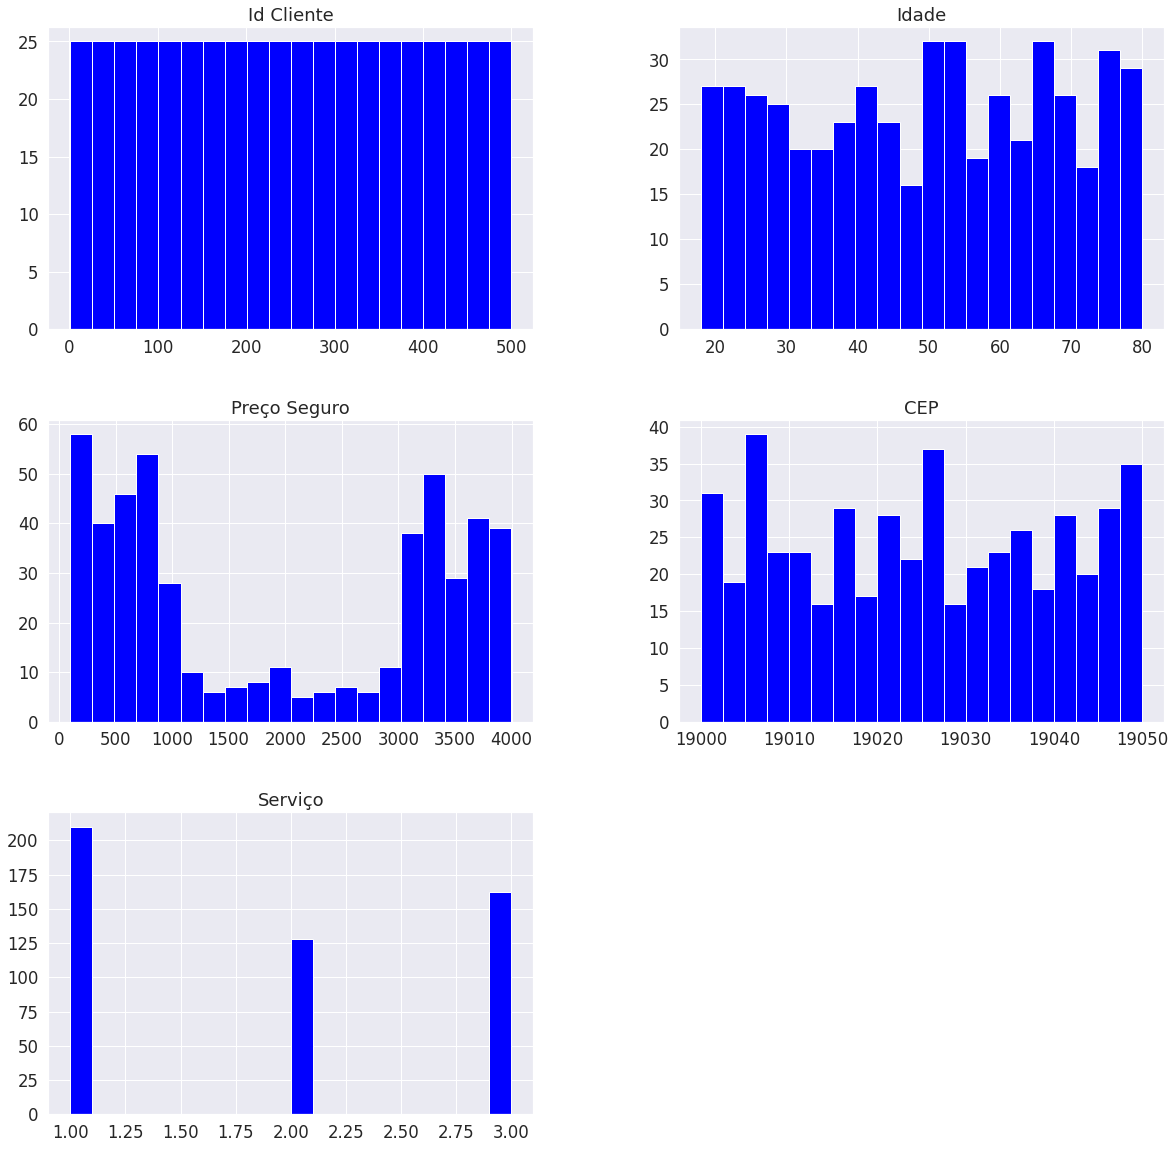

In [7]:
# Plotando Gráficos iniciais para análise
# de informações da Base de Dados

sns.set( font_scale = 1.5, rc = {'figure.figsize':(20, 20)})
eixo = Base_Dados.hist( bins = 20, color = 'blue' )

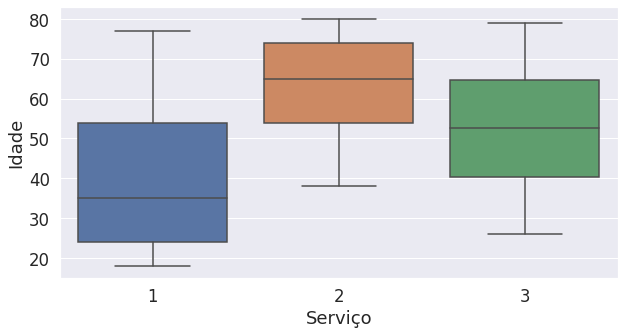

In [9]:
# Plotando Gráfico Boxplot por Serviço x Idade
# Analisando nível de atendimento de acordo com a Idade
# Além de retornar a mediana por cada Status

plt.figure( figsize = (10, 5) )
sns.boxplot( data = Base_Dados, x = 'Serviço', y = 'Idade' );

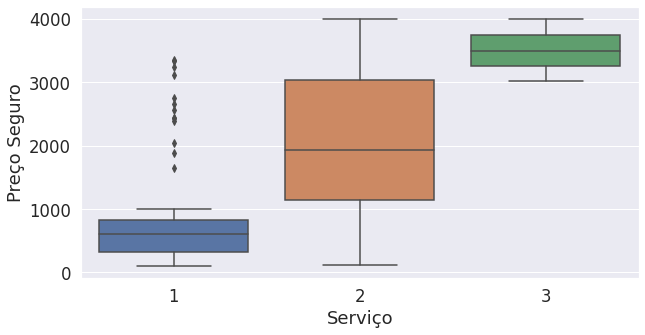

In [10]:
# Plotando o Boxplot por Serviço x Preço Seguro
# Temos alguns insights com base do valor de cada apólice
# Pois de acordo com o tipo de necessidade os valores devem alterar

plt.figure( figsize = (10, 5) )
sns.boxplot( data = Base_Dados, x = 'Serviço', y = 'Preço Seguro' );

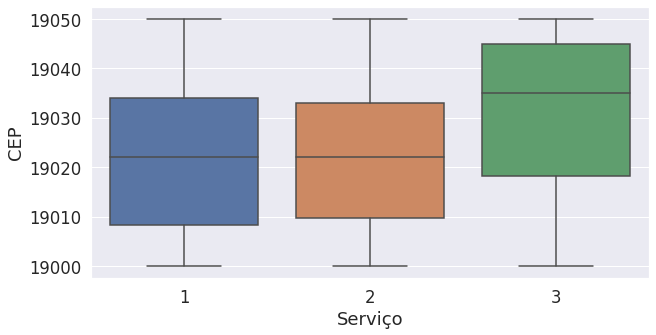

In [11]:
# Plotando o Boxplot por Serviço x CEP
# Nesta plotagem é possível analisar onde os índices de cada serviço
# é contratado por faixas de CEP, aferindo onde ocorre cada tipo de chamado

plt.figure( figsize = (10, 5) )
sns.boxplot( data = Base_Dados, x = 'Serviço', y = 'CEP' );

In [12]:
# Preparando conjunto de Dados, estruturando em arrays
# Para em seguida dividir conjunto de Treino e Teste

Caracteristicas = Base_Dados.iloc[:, 1:4].values
Previsor = Base_Dados.iloc[:, 4:5].values

In [13]:
# Dividindo Conjunto de Dados - Treinamento x Teste
# Treinamento = 70% ... Teste = 30%
# E definindo random_state = 30 para fixar valores de teste/treino
# Sempre que executado para não alterar valores do modelo

from sklearn.model_selection import train_test_split

x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(
    Caracteristicas,
    Previsor,
    test_size = 0.30,
    random_state = 10
)

print(len(Base_Dados))
print(len(x_treinamento))
print(len(x_teste))

500
350
150


In [15]:
# Importando Função e atribuindo a Variável
from sklearn.ensemble import RandomForestClassifier

# Aplicando o número de árvores geradas para treinamento do Modelo
Algoritmo_floresta_aleatoria = RandomForestClassifier(n_estimators = 500)

# Treinando o Modelo
Algoritmo_floresta_aleatoria.fit(x_treinamento, y_treinamento)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(n_estimators=500)

[[60  3  1]
 [ 6 22  8]
 [ 0  1 49]]


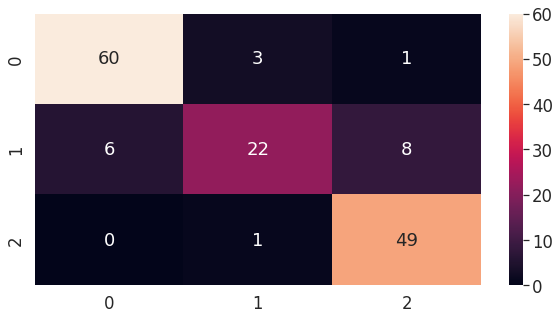

In [16]:
# Criando variável para chamar comando Predict
# trazendo o modelo que melhor performou
Previsoes = Algoritmo_floresta_aleatoria.predict(x_teste)

# Criando Matriz de Confusão com a Confusion Matrix
from sklearn.metrics import confusion_matrix
Matriz_Confusao = confusion_matrix(y_teste, Previsoes)
print(Matriz_Confusao)

# Plotando Matriz de Confusão para ajudar identificar acurácia do modelo
plt.figure(figsize = (10, 5))
sns.heatmap(Matriz_Confusao, annot = True);

In [17]:
# Importando outra métrica para percentil do modelo gerado
from sklearn.metrics import classification_report

# Atribuindo métrica a variável report
# y_teste = real / Previsoes = predict do modelo
# Acurácia 87% - Mas vale analisar individualmente cada variável
# Como por exemplo: Precision e Recall
report = classification_report(y_teste, Previsoes)
print(report)

              precision    recall  f1-score   support

           1       0.91      0.94      0.92        64
           2       0.85      0.61      0.71        36
           3       0.84      0.98      0.91        50

    accuracy                           0.87       150
   macro avg       0.87      0.84      0.85       150
weighted avg       0.87      0.87      0.87       150



In [18]:
# Descobrindo quais clientes irão acionar a segurador futuramente
Novas_Vendas = pd.read_excel('BaseDados_FlorestaDeDecisão.xlsx', 'Plan2')
Novas_Vendas.head()

,Id Cliente,Idade,Preço Seguro,CEP
0,1001,25,801,19001
1,1002,27,1090,19027
2,1003,45,364,19030
3,1004,30,2428,19014
4,1005,32,891,19020


In [19]:
# Criando Variável para Prever quais clientes vão acionar cada tipo de serviço
Prever = Novas_Vendas.iloc[:, 1:4].values

# E adicionando uma coluna nova: Previsão do Modelo para armazenar as inform.
Novas_Vendas['Previsao do Modelo'] = Algoritmo_floresta_aleatoria.predict(Prever)


In [20]:
# Chamando Variável Novas_Vendas
Novas_Vendas

,Id Cliente,Idade,Preço Seguro,CEP,Previsao do Modelo
0,1001,25,801,19001,1
1,1002,27,1090,19027,1
2,1003,45,364,19030,1
3,1004,30,2428,19014,1
4,1005,32,891,19020,1
5,1006,36,823,19025,1
6,1007,44,3895,19032,3
7,1008,36,457,19023,1
8,1009,40,427,19008,1
9,1010,40,928,19009,1


In [21]:
# Contagem de Valores com a entrada dos novos clientes
# Identificando quantidade por serviço acionado
# Legenda: 1 = Não Usou / 2 = Serviço / 3 = Furto

Novas_Vendas['Previsao do Modelo'].value_counts()

1    15
2     5
3     1
Name: Previsao do Modelo, dtype: int64